Nguồn: https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html
# Nội dung chính:
1. Thay đổi không gian màu
2. Biến đổi hình học hình ảnh
3. Phân ngưỡng ảnh

# 1. Thay đổi không gian màu
## 1.1 Mục tiêu:
* Trong phần này, bạn sẽ học cách chuyển đổi giữa các không gian màu, BGR <-> Gray, BGR <-> HSV,...
* Ngoài ra, chúng tôi sẽ tạo một ứng dụng để trích xuất một đối tượng màu trong video.
* Bạn sẽ học về các hàm: `cv.cvtColor()`, `cv.inRange()`,...

## 1.2 Thay đổi không gian màu
Có khoảng 150 phương thức chuyển đổi không gian màu trong OpenCV. Nhưng chúng ta chỉ xem xét 2 phương thức sử dụng rộng rãi nhất là: BGR <-> Gray và BGR M-< HSV.

Để chuyển đổi không gian màu, chúng tối sử dụng hàm `cv.cvtColor(input_image, flag)`, trong đó flag biểu thị phương thức chuyển đổi.

Ví dụ BGR -> Gray, chúng ta sử dụng flag `cv.COLOR_BGR2GRAY`. Giống như vậy với BGR -> HSV thì dùng `cv.COLOR_BGR2HSV`. Để xem các phương thức chuyển đổi, ta dùng lệnh sau:

In [2]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

## 1.3 Theo dõi đối tượng (Object Tracking)

Bây giờ chúng ta đã biết cách chuyển đổi hình ảnh BGR sang HSV, chúng ta có thể sử dụng điều này để trích xuất một đối tượng màu.  Trong HSV, việc thể hiện một màu dễ dàng hơn trong không gian màu BGR.  Trong ứng dụng của chúng tôi, chúng tôi sẽ cố gắng trích xuất một đối tượng màu xanh lam.  Vì vậy, đây là phương pháp:

In [7]:
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

Kết quả video:
![alt](./images/frame.jpg)

## 1.4 Làm thế nào để tìm giá trị HSV

Ví dụ để tìm giá trị HSV của màu xanh lá cây (green), chúng ta làm như sau:

In [4]:
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
hsv_green

array([[[ 60, 255, 255]]], dtype=uint8)

Bây giờ bạn lấy [H - 10, 100, 100] và [H + 10, 255, 255] làm giới hạn dưới và giới hạn trên tương ứng.

# 2. Biến đổi hình học hình ảnh
## 2.1 Mục tiêu:
* Tìm hiểu các phép biến đổi hình học hình ảnh khác như như dịch, xoay chuyển, biến đổi affine...
* Học về các hàm: `cv.getPerspectiveTransform`

## 2.2 Transformations
OpenCV cung cấp 2 hàm hỗ trợ chuyển đổi là <a href="https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983">cv.warpAffine</a> và <a href="https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87">cv.warpPerspective</a>, với chúng bạn có thể thực hiện tất cả các loại biến đổi. `cv.warpAffine` cần ma trận biến đổi 2x3 trong khi `cv.warpPersperspective` lấy ma trận biến đổi 3x3 làm đầu vào.

### 2.2.1 Scaling
Scaling chỉ là thay đổi kích thước của hình ảnh.  OpenCV đi kèm với hàm `cv.resize()` cho mục đích này. Có 1 số phương thức scaling hình ảnh như là **cv.INTER_AREA (co lại) , cv.INTER_CUBIC (slow), cv.INTER_LINEAR (phóng to)**, mặc định là cv.INTER_LINEAR.

Chi tiết về hàm cv.resize: https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

In [11]:
import numpy as np
import cv2 as cv

img = cv.imread('./data/avatar.jpg')
res1 = cv.resize(img, None, fx=1.5, fy=1.5, interpolation = cv.INTER_CUBIC)

#OR
height, width = img.shape[:2]
res2 = cv.resize(img, (2*width, 2*height), interpolation = cv.INTER_CUBIC)

res3 = cv.resize(img, None , fx=0.5, fy=0.5, interpolation = cv.INTER_AREA)
res4 = cv.resize(img, None, fx=1.5, fy=1.5)

cv.imshow("res1", res1)
cv.imshow("res2", res2)
cv.imshow("res3", res3)
cv.imshow("res4", res4)
cv.waitKey()
cv.destroyAllWindows()

### 2.2.2 Translation (Dịch)
Dịch là sự dịch chuyển vị trí của một đối tượng.  Nếu bạn biết sự dịch chuyển theo hướng (x, y) và để nó là (tx, ty), bạn có thể tạo ma trận biến đổi M như sau:

$$\left[ \begin{matrix}
   1  & 0  & t_x   \\
   0  & 1  & t_y   \\
\end{matrix} \right]
$$

In [12]:
import numpy as np
import cv2 as cv

img = cv.imread('./data/avatar.jpg',0)

rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img', dst)
cv.waitKey(0)
cv.destroyAllWindows()

**Chú ý:** Tham số thứ 3 của cv.warpAffine là size của ảnh output. Phải ở dạng *(width, height)*

### 2.2.3 Rotation
Xoay ảnh một góc $\theta$ bằng ma trận biến đổi:
$$\left[ \begin{matrix}
   \cos \theta  & -\sin \theta   \\
   \sin \theta  & \cos \theta   \\
\end{matrix} \right]$$

Nhưng OpenCV cung cấp khả năng xoay theo tỷ lệ với tâm xoay có thể điều chỉnh để bạn có thể xoay ở bất kỳ vị trí nào bạn thích.  Ma trận biến đổi được sửa đổi được cho bởi: (scale gọi là hệ số tỷ lệ) :
$$\left[ \begin{matrix}
   \alpha & \beta & (1-\alpha) . \text{center} . x - \beta . \text{center} . y \\
   -\beta & \alpha & \beta . \text{center} . x - (1-\alpha) . \text{center} . y \\
\end{matrix} \right] $$
Với:
$$\alpha = \text{scale} . \cos \theta$$
$$\beta = \text{scale} . \sin \theta$$

Để tìm ma trận biến đổi này, OpenCV cung cấp một hàm, <a href="https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326">cv.getRotationMatrix2D</a> (tham số thứ 3 là hệ số tỷ lệ). Kiểm tra ví dụ dưới đây để xoay hình ảnh 90 độ so với trung tâm:

In [13]:
img = cv.imread('./data/avatar.jpg',0)
rows,cols = img.shape

# cols-1 and rows-1 là giới hạn các toạ độ.
M = cv.getRotationMatrix2D( ( (cols-1)/2.0, (rows-1)/2.0) , 90, 1)
print(M)
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img', dst)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 6.123234e-17  1.000000e+00  1.000000e+00]
 [-1.000000e+00  6.123234e-17  7.180000e+02]]


### 2.2.4 Affine Transformation (Biến đổi Affine)
Trong phép biến đổi affine, tất cả các đường song song trong ảnh gốc sẽ vẫn song song trong ảnh đầu ra.  Để tìm ma trận biến đổi, chúng ta cần ba điểm từ hình ảnh đầu vào và vị trí tương ứng của chúng trong hình ảnh đầu ra. Hàm <a href="https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga8f6d378f9f8eebb5cb55cd3ae295a999">cv.getAffinTransform</a> sẽ tạo một ma trận 2x3 để biến đổi.

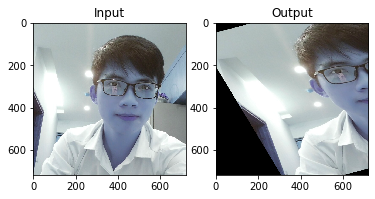

In [15]:
import matplotlib.pyplot as plt
img = cv.imread('./data/avatar.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Cụ thể, ảnh biến đổi được xoay như hình dưới đây, chú ý các màu xanh là điểm ta chọn để xoay:
![alt](./images/affine.jpg)

### 2.2.5 Perspective Transformation (chuyển đổi phối cảnh)
Để chuyển đổi phối cảnh, bạn cần một ma trận biến đổi 3x3.  Các đường thẳng sẽ vẫn thẳng ngay cả sau khi chuyển đổi. Để tìm ma trận biến đổi này, bạn cần 4 điểm trên hình ảnh đầu vào và các điểm tương ứng trên hình ảnh đầu ra. Trong số 4 điểm này, 3 trong số đó không nên thẳng hàng. Sau đó, ma trận biến đổi có thể được tìm thấy bởi hàm `cv.getPersperspectiveTransform`.  Sau đó áp dụng `cv.warpPersperspective` với ma trận biến đổi 3x3 này.

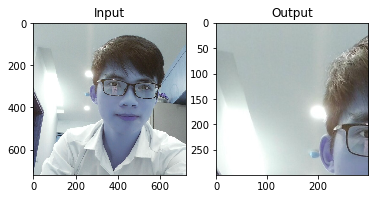

In [16]:
img = cv.imread('./data/avatar.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Cụ thể, ảnh chuyển đổi được thực hiện như hình dưới đây, các điểm màu xanh là các điểm ta chọn:
![alt](./images/perspective.jpg)

Bạn có thể tìm đọc tài liệu bổ sung: 

"Computer Vision: Algorithms and Applications", Richard Szeliski

# 3. Phân ngưỡng ảnh